<a href="https://colab.research.google.com/github/AAKAAASSHHH24/NLP-BASICS/blob/main/TEXT_PREDICTION(embedding_layer).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
ROOT = '/content/drive/MyDrive/projects'
os.chdir(ROOT)

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
pwd

'/content/drive/MyDrive/projects'

In [8]:
#from getpass import getpass
#os.environ['KAGGLE_USERNAME'] = getpass('Enter KAGGLE_USERNAME secret value: ')
#os.environ['KAGGLE_KEY'] = getpass('Enter KAGGLE_KEY secret value: ')

In [11]:
import requests
file_url = "https://query.data.world/s/vk2wj2sej6ruhab5dklwb5ggatwc26"
	
r = requests.get(file_url, stream = True)

with open("/content/drive/MyDrive/projects/terrorism.csv", "wb") as file:
	for block in r.iter_content(chunk_size = 1024):
		if block:
			file.write(block)


In [12]:
corona = pd.read_csv('terrorism.csv')

In [13]:
corona.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,civilians,militants_terrorists_insurgents,security_forces,total_number_of_people,accuracy,...,state_full,subject,svmlabel1,svmlabel1prob,svmlabel2,svmlabel2prob,svmobjecttypelab,svmobjecttypeprob,total_number_of_people_gold,verb
0,711601341,False,finalized,1,4/30/15 8:54,0.0,3.0,1.0,4,1.0,...,Jammu and Kashmir,NaN,security,0.997059,not-assigned,0.991717,person,0.996510,NaN,killed
1,711601342,False,finalized,1,4/30/15 9:41,0.0,7.0,0.0,7,1.0,...,Jammu and Kashmir,NaN,terrorist,0.979219,not-assigned,0.994222,person,0.986274,NaN,killed
2,711601343,False,finalized,1,4/30/15 8:35,0.0,1.0,0.0,1,1.0,...,NaN,NaN,terrorist,0.948564,not-assigned,0.990548,person,0.996909,NaN,arrested
3,711601344,False,finalized,1,4/30/15 9:12,NaN,7.0,NaN,7,1.0,...,Assam,NaN,terrorist,0.999999,not-assigned,1.000000,person,0.991712,NaN,surrendered
4,711601345,False,finalized,1,4/30/15 9:23,0.0,2.0,0.0,2,1.0,...,NaN,NaN,terrorist,0.858030,maoist,0.914427,person,0.987609,NaN,killed


In [14]:
data = corona['objectcleanpp']
data

0                  militants and security forces personnel
1                                          other militants
2        top naga rebel and associate national socialis...
3        militants garo national front gnf underground ...
4                     suspected naxalites belonging to pwg
                               ...                        
27228    communist party india maoist cpi aoist cadres ...
27229    supporter communist party india marxist lenini...
27230                                   armed maoist cadre
27231                               pakistani militant let
27232                            arun yadav maoist village
Name: objectcleanpp, Length: 27233, dtype: object

In [15]:
### we need to create a sliding window where it will be a tuple predicting the next alphabet

In [16]:
def sliding_window(txt):
  N = len(txt) - 1
  for i in range(N):
    yield txt[i], txt[i+1]   #current letter and next letter tuple

In [17]:
import itertools as it

In [22]:
window = list(it.chain(*[sliding_window(str(txt)) for txt in data[:10000]]))
window

[('m', 'i'),
 ('i', 'l'),
 ('l', 'i'),
 ('i', 't'),
 ('t', 'a'),
 ('a', 'n'),
 ('n', 't'),
 ('t', 's'),
 ('s', ' '),
 (' ', 'a'),
 ('a', 'n'),
 ('n', 'd'),
 ('d', ' '),
 (' ', 's'),
 ('s', 'e'),
 ('e', 'c'),
 ('c', 'u'),
 ('u', 'r'),
 ('r', 'i'),
 ('i', 't'),
 ('t', 'y'),
 ('y', ' '),
 (' ', 'f'),
 ('f', 'o'),
 ('o', 'r'),
 ('r', 'c'),
 ('c', 'e'),
 ('e', 's'),
 ('s', ' '),
 (' ', 'p'),
 ('p', 'e'),
 ('e', 'r'),
 ('r', 's'),
 ('s', 'o'),
 ('o', 'n'),
 ('n', 'n'),
 ('n', 'e'),
 ('e', 'l'),
 ('o', 't'),
 ('t', 'h'),
 ('h', 'e'),
 ('e', 'r'),
 ('r', ' '),
 (' ', 'm'),
 ('m', 'i'),
 ('i', 'l'),
 ('l', 'i'),
 ('i', 't'),
 ('t', 'a'),
 ('a', 'n'),
 ('n', 't'),
 ('t', 's'),
 ('t', 'o'),
 ('o', 'p'),
 ('p', ' '),
 (' ', 'n'),
 ('n', 'a'),
 ('a', 'g'),
 ('g', 'a'),
 ('a', ' '),
 (' ', 'r'),
 ('r', 'e'),
 ('e', 'b'),
 ('b', 'e'),
 ('e', 'l'),
 ('l', ' '),
 (' ', 'a'),
 ('a', 'n'),
 ('n', 'd'),
 ('d', ' '),
 (' ', 'a'),
 ('a', 's'),
 ('s', 's'),
 ('s', 'o'),
 ('o', 'c'),
 ('c', 'i'),
 ('i', 'a'),

In [23]:
pd.DataFrame(window)

,0,1
0,m,i
1,i,l
2,l,i
3,i,t
4,t,a
...,...,...
304546,t,r
304547,r,i
304548,i,c
304549,c,t


In [32]:
unique_list = np.unique(np.concatenate((pd.DataFrame(window)[0].unique(), pd.DataFrame(window)[1].unique())))
unique_list

array([' ', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l',
       'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y',
       'z'], dtype=object)

In [34]:
mapping = {char:idx for idx,char in enumerate(unique_list)}
mapping

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [35]:
## right now we have string in and string out so we will use the 
# mapping dictionary that we just created to create a integer in and integer out

In [37]:
integer_in = np.array([mapping[w[0]] for w in window])
integer_in

array([13,  9, 12, ...,  9,  3, 20])

In [38]:
integer_out = np.array([mapping[w[1]] for w in window])
integer_out

array([ 9, 12,  9, ...,  3, 20, 19])

In [39]:
num_letters= len(mapping)

In [41]:
embedding = tf.keras.layers.Embedding(num_letters,2, input_length=1) #creating an embedding layer,defining the params
model_emb = tf.keras.Sequential([embedding])

In [42]:
out_array = model_emb.predict(integer_in)
out_array.shape

9518/9518 [==============================] - 10s 1ms/step


(304551, 1, 2)

In [43]:
## 1*2 vectors are the outputs

In [44]:
import matplotlib.pyplot as plt

In [52]:
idx_of_char = np.array([list(mapping.values())]).T   #extracting values from the dictionary

In [46]:
translator = {val:key for key,val in mapping.items()} #reversing the string to integer to inter to string
translator


{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [53]:
idx_of_char

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26]])

In [47]:
preds = model_emb.predict(idx_of_char)
preds

1/1 [==============================] - 0s 25ms/step


array([[[-0.02500197,  0.01816939]],

       [[ 0.00379479,  0.00376929]],

       [[-0.03411479, -0.02964273]],

       [[ 0.01552704,  0.00144928]],

       [[-0.02015486,  0.03501442]],

       [[ 0.01918921,  0.02791682]],

       [[ 0.01174083,  0.02490847]],

       [[ 0.04262657,  0.04572609]],

       [[-0.04968879, -0.04345205]],

       [[-0.03654976,  0.04819474]],

       [[-0.02676517,  0.01085875]],

       [[ 0.03190098,  0.00411894]],

       [[ 0.01890466,  0.04438274]],

       [[-0.0471611 , -0.02589819]],

       [[ 0.03585741,  0.03418816]],

       [[-0.04420839, -0.02013303]],

       [[-0.03880252,  0.04126677]],

       [[-0.02502644,  0.03458972]],

       [[ 0.03927528, -0.04914732]],

       [[ 0.02247851, -0.01139013]],

       [[ 0.00152401,  0.0128341 ]],

       [[ 0.00314003,  0.03659585]],

       [[ 0.03618767,  0.04288641]],

       [[-0.00266289,  0.00017792]],

       [[-0.03273328, -0.01095883]],

       [[-0.01721712,  0.02895638]],

       [[-0.

## As you can see, each letter (0 to 26) is represented by a vector of length 2. If we print the weights of the embedding layer, we get above result.These weights are basically the vector representations of the words in vocabulary. 

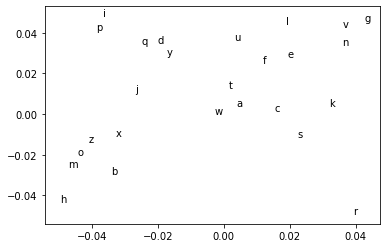

In [54]:
plt.scatter(preds[:,0,0], preds[:,0,1], alpha=0)
for i, idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1], translator[idx[0]])  #position in the graph(x,y) to place the text

plt.show()

In [67]:
## TRAIN OUR EMBEDED layer ON DATASET
## training of the embeded layer will happen when the predictions will be wrong and backpropagation will happen

In [56]:
LAYERS = [embedding, 
          tf.keras.layers.Flatten(), 
          tf.keras.layers.Dense(num_letters, 
                                activation = "softmax")]

model_pred = tf.keras.Sequential(LAYERS)


In [57]:
model_pred.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 2)              54        
                                                                 
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 27)                81        
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


In [58]:
adam = tf.keras.optimizers.Adam(learning_rate = .001)

model_pred.compile(adam, "categorical_crossentropy", metrics = ['accuracy'])

In [59]:
out_pred = model_pred.predict(integer_in)
out_pred.shape

9518/9518 [==============================] - 11s 1ms/step


(304551, 27)

In [68]:

from sklearn.preprocessing import OneHotEncoder


In [61]:
integer_out = integer_out.reshape(-1,1)
integer_out.shape

(304551, 1)

In [62]:
to_predict = OneHotEncoder(sparse= False).fit_transform(integer_out)

In [63]:
model_pred.fit(integer_in, to_predict, epochs = 30)

Epoch 1/30
9518/9518 [==============================] - 16s 2ms/step - loss: 2.6367 - accuracy: 0.1883
Epoch 2/30
9518/9518 [==============================] - 15s 2ms/step - loss: 2.5670 - accuracy: 0.1867
Epoch 3/30
9518/9518 [==============================] - 15s 2ms/step - loss: 2.5646 - accuracy: 0.1876
Epoch 4/30
9518/9518 [==============================] - 15s 2ms/step - loss: 2.5638 - accuracy: 0.1877
Epoch 5/30
9518/9518 [==============================] - 22s 2ms/step - loss: 2.5633 - accuracy: 0.1878
Epoch 6/30
9518/9518 [==============================] - 15s 2ms/step - loss: 2.5630 - accuracy: 0.1885
Epoch 7/30
9518/9518 [==============================] - 19s 2ms/step - loss: 2.5627 - accuracy: 0.1948
Epoch 8/30
9518/9518 [==============================] - 15s 2ms/step - loss: 2.5625 - accuracy: 0.2012
Epoch 9/30
9518/9518 [==============================] - 16s 2ms/step - loss: 2.5624 - accuracy: 0.2041
Epoch 10/30
9518/9518 [==============================] - 16s 2ms/step - l

1/1 [==============================] - 0s 19ms/step


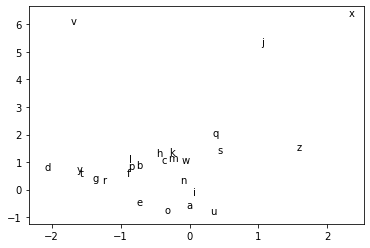

In [66]:
preds = model_emb.predict(idx_of_char)
plt.figuresize(10,10)
plt.scatter(preds[:,0,0], preds[:,0,1], alpha=0)
for i, idx in enumerate(idx_of_char):
  plt.text(preds[i,0,0], preds[i,0,1], translator[idx[0]])

plt.show()

### We can clearly observe vowels and alphabets were differentiated by the embedding layer by forming clusters  